In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Add, Activation
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# to study
import numpy as np

2024-01-16 16:46:39.517929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 16:46:39.518003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 16:46:39.567055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 16:46:39.669546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 16:46:40.875998: W tensorflow/compiler/tf2

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
print(train_images.shape)


(60000, 28, 28)


In [4]:

def print_raw_data_img(num_image):
    img = train_images[num_image]
    print(img)

print_raw_data_img(42)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 25

In [5]:
array_a  = np.array([[0,1,2], [3,4,5], [6,7,8]])

max_value = np.max(array_a)
print(max_value)

print(array_a.shape) # (2,3)
print(array_a) # (2,3)
print(array_a[1][1]) # 4 prima riga prima colonna

# nornalizzazione
array_a = (array_a / max_value)

print(array_a.shape)
print(array_a)
print(array_a[1][1])


# Appiattimento
array_a = array_a.reshape(-1, 1)

print(array_a.shape)
print(array_a)




8
(3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]
4
(3, 3)
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]
0.5
(9, 1)
[[0.   ]
 [0.125]
 [0.25 ]
 [0.375]
 [0.5  ]
 [0.625]
 [0.75 ]
 [0.875]
 [1.   ]]


In [6]:
# Preprocessing dei dati

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
train_images = train_images.reshape(-1, 28*28) # 784
test_images = test_images.reshape(-1, 28*28)


In [7]:
# trasformazione delle label tramite hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# creazione del modello
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))

# compilazione del modello
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                2

2024-01-16 16:46:43.965751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 16:46:44.194957: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 16:46:44.195277: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
history = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)


Epoch 1/50
118/118 [==============================] - 1s 5ms/step - loss: 1.1683 - accuracy: 0.5896 - val_loss: 0.5779 - val_accuracy: 0.8208
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8768 - val_loss: 0.3373 - val_accuracy: 0.9047
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.9134 - val_loss: 0.3173 - val_accuracy: 0.9107
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.9263 - val_loss: 0.2654 - val_accuracy: 0.9293
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9343 - val_loss: 0.2327 - val_accuracy: 0.9355
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9393 - val_loss: 0.2200 - val_accuracy: 0.9374
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9414 - val_loss: 0.2218 - val_accuracy: 0.9373
Epoch 

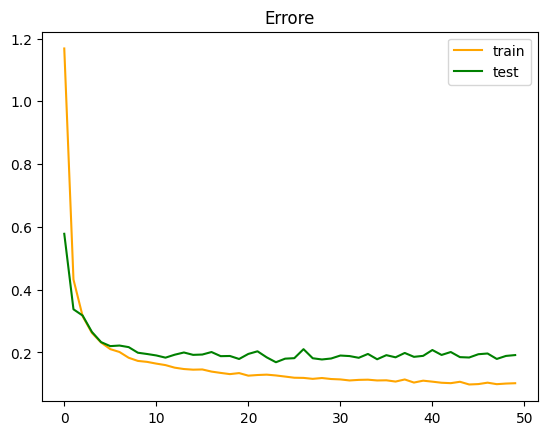

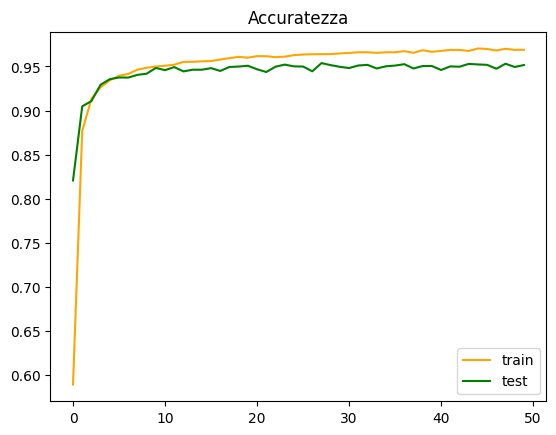

In [10]:
# stampe risultati

# errore modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.title('Errore')
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.title("Accuratezza")
plt.legend()
plt.show()

In [11]:
# Valutazione del modello
evaluations = model.evaluate(
    test_images,
    test_labels
)

for i in range(0, len(model.metrics_names)):
    print(f"{model.metrics_names[i]} -> {evaluations[i]}")


313/313 [==============================] - 0s 1ms/step - loss: 0.1915 - accuracy: 0.9515
loss -> 0.19146792590618134
accuracy -> 0.9514999985694885


In [12]:
### RESIDUAL NETWORK 
### Use Function API di Keras
shape_value = train_images.shape[1] # 28x28 -> 784
print(shape_value)


input = Input(shape=(shape_value)) # posso creare anche custom objects che userò successivamente senza ripetere tutto.

dense_16_relu = Dense(units=16, activation='relu') 

dense_0 = dense_16_relu(input)
dense_1 = Dense(units=16, activation='relu')(dense_0)
dense_2 = Dense(units=16)(dense_1)

residual_0 = Add()([dense_0, dense_2])
residual_0 = Activation('relu')(residual_0) # torna indietro con la derivata prima parziale della funzione relu

dense_3 = Dense(units=16, activation='relu')(residual_0)
dense_4 = Dense(units=16, activation='relu')(dense_3)
dense_5 = Dense(units=16)(dense_4)

residual_1 = Add()([dense_3, dense_5])
residual_1 = Activation('relu')(residual_1)

dense_6 = Dense(units=16, activation='relu')(residual_1)
dense_7 = Dense(units=16, activation='relu')(dense_6)
dense_8 = Dense(units=16)(dense_7)

residual_2 = Add()([dense_6, dense_8])
residual_2 = Activation('relu')(residual_2)

output = Dense(units=10, activation='softmax')(residual_2)

model = tf.keras.models.Model(
    inputs=[input],
    outputs=[output],
    name='ResNet'
)

784


In [13]:
# compilazione del modello
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 16)                   12560     ['input_1[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 16)                   272       ['dense_10[0][0]']            
                                                                                                  
 dense_12 (Dense)            (None, 16)                   272       ['dense_11[0][0]']            
                                                                                             

In [14]:
history_res = model.fit(
    x=train_images,
    y=train_labels,
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images,
        test_labels
    )
)

Epoch 1/50
118/118 [==============================] - 1s 3ms/step - loss: 0.7651 - accuracy: 0.7583 - val_loss: 0.3326 - val_accuracy: 0.9055
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9168 - val_loss: 0.2622 - val_accuracy: 0.9236
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9309 - val_loss: 0.2183 - val_accuracy: 0.9360
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9395 - val_loss: 0.2240 - val_accuracy: 0.9347
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9444 - val_loss: 0.1881 - val_accuracy: 0.9449
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9516 - val_loss: 0.1805 - val_accuracy: 0.9478
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9525 - val_loss: 0.1963 - val_accuracy: 0.9442
Epoch 

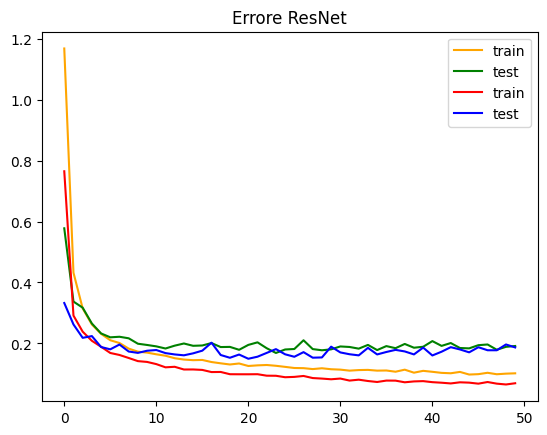

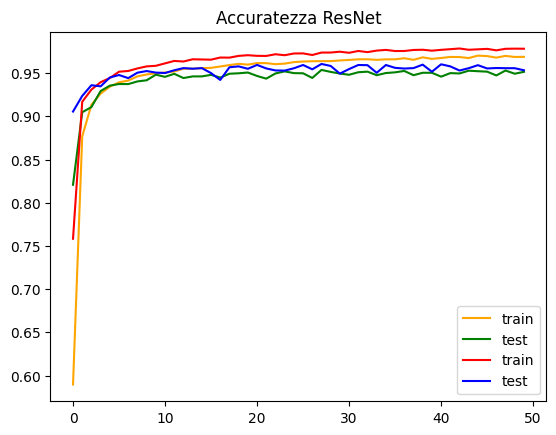

In [15]:
# Stampe i risultati

# errore modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.plot(history_res.history['loss'], color='red', label='train')
plt.plot(history_res.history['val_loss'], color='blue', label='test')
plt.title('Errore ResNet' )
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.plot(history_res.history['accuracy'], color='red', label='train')
plt.plot(history_res.history['val_accuracy'], color='blue', label='test')
plt.title("Accuratezza ResNet")
plt.legend()
plt.show()


In [16]:
evaluations_res = model.evaluate(
    test_images,
    test_labels
)

for i in range(0, len(model.metrics_names)):
    print(f"{model.metrics_names[i]} -> {evaluations_res[i]}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9533
loss -> 0.1867479532957077
accuracy -> 0.9532999992370605
